In [4]:
'''
Project 2 for CSCI 602
Group Members: Aditi Misra, Rickey Prewitt, Mousa Toure, Sai Tirumalasetty, Mikala Simons, Caleb Winfield, and Christopher Payne
Date: 30 October 2024

Project Description:
modify the provided image auto encoder to use a middle layer with shape 20x20, and input size of 32x32, the output should still be 32x32. use dataset cifar10
Import TensorFlow and other libraries
'''
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist, cifar10
from tensorflow.keras.models import Model
from keras.callbacks import CSVLogger

# Load the dataset
(x_train, _), (x_test, _) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

"""Basic autoencoder
Define an autoencoder with two Dense layers: an encoder, which compresses the images into a 400 dimensional latent vector,
 and a decoder, that reconstructs the original image from the latent space.
To define your model, use the Keras Model Subclassing API. (https://www.tensorflow.org/guide/keras/custom_layers_and_models)"""

class Autoencoder(Model):
  def __init__(self, latent_dim, shape):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.shape = shape
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(tf.math.reduce_prod(shape).numpy(), activation='sigmoid'),
      layers.Reshape(shape)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


shape = x_test.shape[1:]
latent_dim = 400
print(f"shape: {shape}")
print(f"latent_dim: {latent_dim}")
autoencoder = Autoencoder(latent_dim, shape)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError(), metrics=['accuracy'])

# Create CSVLogger callback
csv_logger = CSVLogger('training_log.csv', append=True)

# Train the model using x_train as both the input and the target. The encoder will learn to compress the dataset from 1024 (32x32) dimensions to the latent space,
#  and the decoder will learn to reconstruct the original images.
history = autoencoder.fit(x_train, x_train,
                epochs=3,
                shuffle=True,
                validation_data=(x_test, x_test), callbacks=[csv_logger])



(50000, 32, 32, 3)
(10000, 32, 32, 3)
shape: (32, 32, 3)
latent_dim: 400
Epoch 1/3
1563/1563 [==============================] - 38s 24ms/step - loss: 0.0236 - accuracy: 0.6424 - val_loss: 0.0155 - val_accuracy: 0.7076
Epoch 2/3
1563/1563 [==============================] - 44s 28ms/step - loss: 0.0130 - accuracy: 0.7035 - val_loss: 0.0117 - val_accuracy: 0.7092
Epoch 3/3
1563/1563 [==============================] - 38s 24ms/step - loss: 0.0108 - accuracy: 0.7087 - val_loss: 0.0103 - val_accuracy: 0.7080


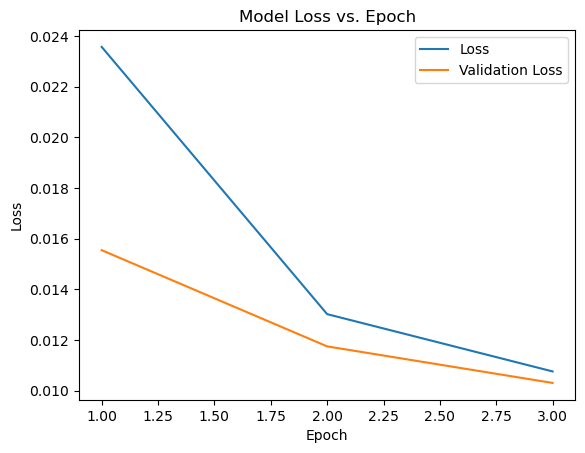

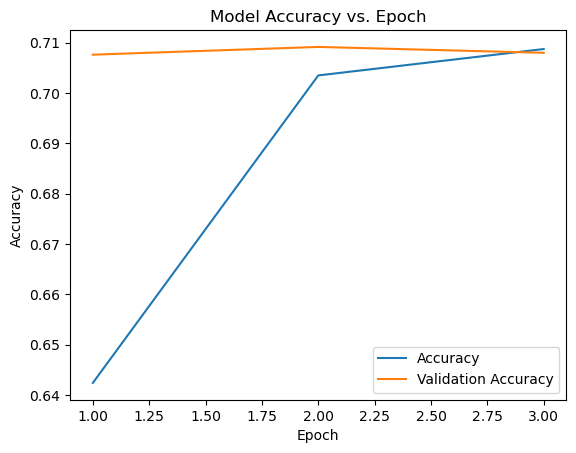

In [5]:
# Plot training & validation loss values
epochs = range(1,4)

plt.plot(epochs,history.history['loss'],label="Loss")
plt.plot(epochs,history.history['val_loss'],label="Validation Loss")
plt.title('Model Loss vs. Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(epochs,history.history['accuracy'],label="Accuracy")
plt.plot(epochs,history.history['val_accuracy'],label="Validation Accuracy")
plt.title('Model Accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()



In [ ]:
import csv

# know the file path
filepath = 'training_log.csv'
# use a context manager to open the file as a read-only
with open(filepath,"r") as file:
    # use csv library to read the csv and store it in a variable
    csv_reader = csv.reader(file)
    # read the first row of the csv if it contains headers and store those in a variable
    headers = next(csv_reader)
    print(f"Headers: {headers}")

    # A csv is best treated as a dictionary, so create an empty dict to hold the data
    data = {}
    # For every header in headers, set the header as a key and the value as an empty array.
    for header in headers:
        data[header] = []

    print(f"data: {data}")

    # Now for row in the file, for each header in header, append that data in the header's column to the empty array for the dicitonary 
    for row in csv_reader:
        for i, header in enumerate(headers):
            data[header].append(row[i])

    print(f"Log Data: {data}")


Headers: ['epoch', 'accuracy', 'loss', 'val_accuracy', 'val_loss']
data: {'epoch': [], 'accuracy': [], 'loss': [], 'val_accuracy': [], 'val_loss': []}
Log Data: {'epoch': ['0', '1', '2'], 'accuracy': ['0.6424075961112976', '0.7034995555877686', '0.7087429761886597'], 'loss': ['0.023561691865324974', '0.01301833987236023', '0.01075784582644701'], 'val_accuracy': ['0.7076197266578674', '0.7091609239578247', '0.7079882025718689'], 'val_loss': ['0.01554186549037695', '0.011746001429855824', '0.010304477997124195']}


In [14]:
for i in data:
    print(data[i])
    data[i] = [float(element) for element in data[i]]
    print(data[i])

['0', '1', '2']
[0.0, 1.0, 2.0]
['0.6424075961112976', '0.7034995555877686', '0.7087429761886597']
[0.6424075961112976, 0.7034995555877686, 0.7087429761886597]
['0.023561691865324974', '0.01301833987236023', '0.01075784582644701']
[0.023561691865324974, 0.01301833987236023, 0.01075784582644701]
['0.7076197266578674', '0.7091609239578247', '0.7079882025718689']
[0.7076197266578674, 0.7091609239578247, 0.7079882025718689]
['0.01554186549037695', '0.011746001429855824', '0.010304477997124195']
[0.01554186549037695, 0.011746001429855824, 0.010304477997124195]


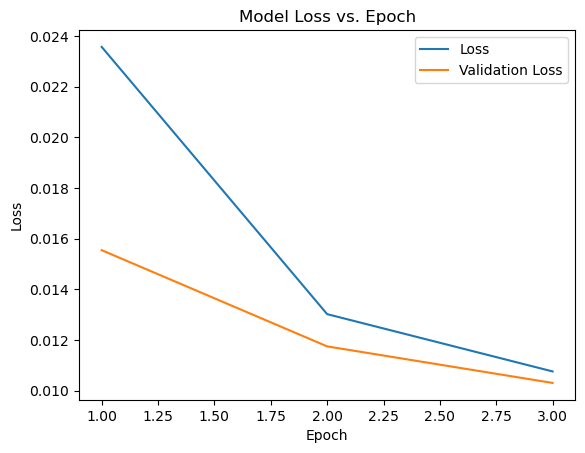

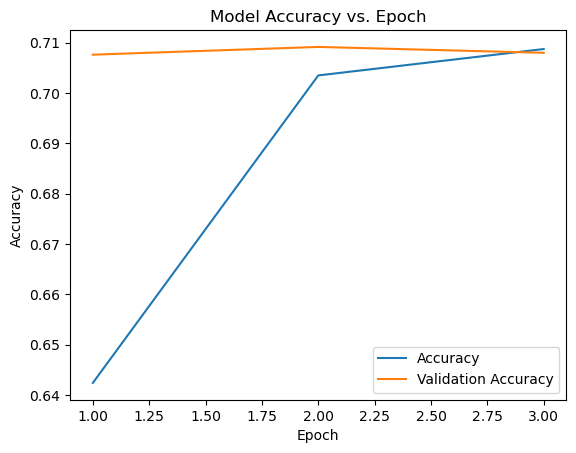

In [15]:
# Plot training & validation loss values
x = [epoch+1 for epoch in data['epoch']]
plt.plot(x,data['loss'],label="Loss")
plt.plot(x,data['val_loss'],label="Validation Loss")
plt.title('Model Loss vs. Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(x,data['accuracy'],label="Accuracy")
plt.plot(x,data['val_accuracy'],label="Validation Accuracy")
plt.title('Model Accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


encoded_imgs: (10000, 400)
decoded_imgs: (10000, 32, 32, 3)


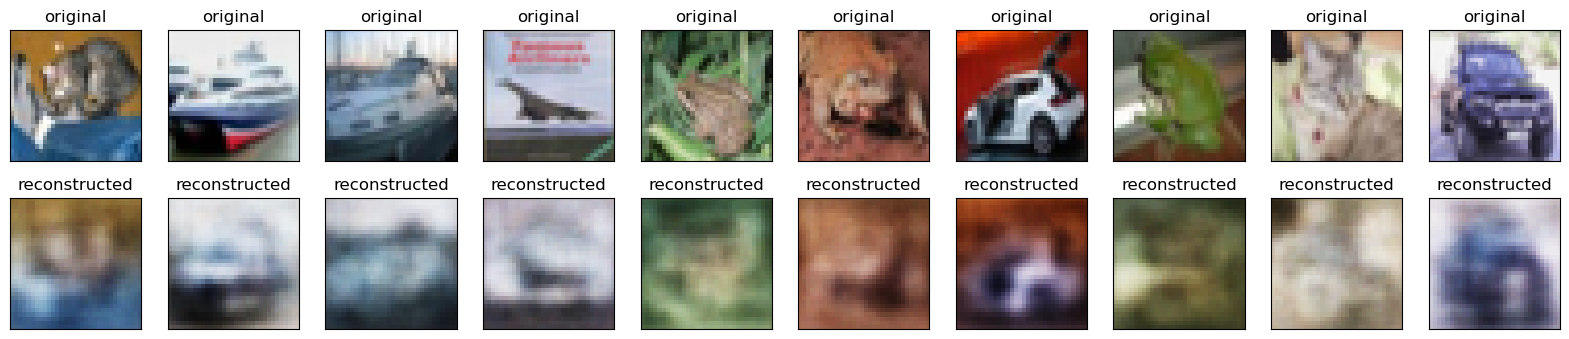

In [8]:

# Now that the model is trained, let's test it by encoding and decoding images from the test set.
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
print(f"encoded_imgs: {encoded_imgs.shape}")
print(f"decoded_imgs: {decoded_imgs.shape}")

# plot the first ten images of the original and reconstruction.

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()